## Петрушко Алексей, 8-903-200-7185, apetrushko@yandex.ru

## Необходимо ответить на вопросы
1. Назовите общую сумму продаж в рублях за июль?
2. Какая общая сумма прибыли (продажи-себестоимость) в рублях в октябре?
3. Назовите артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе?
4. Какой остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе?
5. Определите, нормальное ли распределение ‘Продаж, шт’? Вычислите квадратное отклонение выборки, а также в каком диапазоне лежат 95% значений.
	Постройте график распределения количества буквенных размеров ('M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS') в выборке


In [1]:
# загружаем нужные библиотеки для обработки данных

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt           # графики
import seaborn as sns

**Данные по продажам**

In [2]:
sales_df = pd.read_excel('test_sales_to_share.xlsx')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60074 entries, 0 to 60073
Data columns (total 4 columns):
Артикул старый    60074 non-null object
Размер            60074 non-null object
Месяц             60074 non-null int64
Продажи, шт.      60074 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [3]:
sales_df.describe()

,Месяц,"Продажи, шт."
count,60074.000000,60074.000000
mean,9.000000,84.099461
std,2.000017,19.936633
min,6.000000,2.000000
25%,7.000000,71.000000
50%,9.000000,84.000000
75%,11.000000,98.000000
max,12.000000,174.000000


In [4]:
# замена названий столбцов
sales_df.columns = ['article_old', 'size', 'month', 'sales_in_units' ]

In [5]:
sales_df.head()

,article_old,size,month,sales_in_units
0,02025727Y052D0/55,XS,9,88
1,02025727Y052D0/55,S,6,128
2,020245D5Z022/55D0,M,7,83
3,020245D5Z022/55D0,M,9,68
4,020245D5Z022/55D0,L,6,74


In [6]:
sales_df.article_old.unique()

array(['02025727Y052D0/55', '020245D5Z022/55D0', '02025727Y052D0/50', ...,
       '92011945969500/31', '21014942301500/50', '32014947Q56500/11'],
      dtype=object)

In [7]:
sales_df['size'].unique()

array(['XS', 'S', 'M', 'L', 'XXXL', 'XXL', '28', 'XL', '34', 'XXS', '29',
       '30', '31', '4XL', '26', '33', '27', '32', '38', '0', '25', '36',
       '40', '35', '54-58', '37'], dtype=object)

In [8]:
# сначала переставим местами пары в артикулах где слэш был на 15 позиции и удалим слэш
sales_df['article_new'] = sales_df['article_old'].replace(
                                    r'(\w\w)(\w\w)(\w\w)(\w\w)(\w\w)(\w\w)(\w\w)/(\w\w)', r'\1\2\3\4\5\6\8\7', regex=True)

In [9]:
sales_df['article_new'] = sales_df['article_new'].str.replace('/', '')

In [10]:
sales_df.head()

,article_old,size,month,sales_in_units,article_new
0,02025727Y052D0/55,XS,9,88,02025727Y05255D0
1,02025727Y052D0/55,S,6,128,02025727Y05255D0
2,020245D5Z022/55D0,M,7,83,020245D5Z02255D0
3,020245D5Z022/55D0,M,9,68,020245D5Z02255D0
4,020245D5Z022/55D0,L,6,74,020245D5Z02255D0


In [11]:
#проверяем пропущенные значения
for col in sales_df.columns:
    pct_missing = np.mean(sales_df[col].isnull())
    print('{} - {:.2%}'.format(col, pct_missing))

article_old - 0.00%
size - 0.00%
month - 0.00%
sales_in_units - 0.00%
article_new - 0.00%


**Данные по остаткам**

In [12]:
remains_df = pd.read_excel('test_remains_to_share.xlsx')
remains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10328 entries, 0 to 10327
Data columns (total 5 columns):
Артикул новый             10328 non-null object
Размер                    10328 non-null object
Остаток на складе, шт.    10328 non-null int64
Себестоимость, руб.       10328 non-null int64
Цена продажи, руб.        10328 non-null int64
dtypes: int64(3), object(2)
memory usage: 403.6+ KB


In [13]:
remains_df.describe()

,"Остаток на складе, шт.","Себестоимость, руб.","Цена продажи, руб."
count,10328.000000,10328.000000,10328.000000
mean,509.839659,906.827266,2268.340143
std,687.406540,346.132832,909.251717
min,1.000000,300.000000,602.000000
25%,121.000000,607.000000,1498.000000
50%,298.000000,911.000000,2249.000000
75%,635.000000,1208.000000,2969.000000
max,9610.000000,1500.000000,4476.000000


In [14]:
# замена названий столбцов
remains_df.columns = ['article_new', 'size', 'stock_balance_in_units', 'cost_price_rub', 'price_rub' ]
remains_df.head()

,article_new,size,stock_balance_in_units,cost_price_rub,price_rub
0,010112159012 0100 ...,M,118,1211,2846
1,010112159052 01P0 ...,L,247,465,1311
2,010112159052 01P0 ...,M,134,763,1564
3,010112159052 01P0 ...,S,93,762,1631
4,010112159052 58P0 ...,XXL,20,342,698


In [15]:
remains_df.article_new.unique()

array(['010112159012 0100                                 ',
       '010112159052 01P0                                 ',
       '010112159052 58P0                                 ', ...,
       '920239I62175 0300                                 ',
       '920239I8G025 0200                                 ',
       '920239I8G155 3000                                 '], dtype=object)

In [16]:
remains_df.article_new = remains_df.article_new.replace(r'\s+','', regex=True)
remains_df.article_new.unique()

array(['0101121590120100', '01011215905201P0', '01011215905258P0', ...,
       '920239I621750300', '920239I8G0250200', '920239I8G1553000'],
      dtype=object)

In [17]:
remains_df['size'].unique()

array(['M                        ', 'L                        ',
       'S                        ', 'XXL                      ',
       'XL                       ', '54-58                    ',
       'XXXL                     ', 'no size                  ',
       '25-27                    ', '27-29                    ',
       '34                       ', '31                       ',
       '36                       ', '38                       ',
       '30                       ', '32                       ',
       '33                       ', 'XS                       ',
       '4XL                      ', '40                       ',
       '28                       ', '41                       ',
       '42                       ', '43                       ',
       '44                       ', 'XXS                      ',
       '23-25                    ', '37                       ',
       '39                       ', '25                       ',
       '26               

In [18]:
remains_df['size'].replace(r'\s+','', regex=True, inplace=True)
remains_df['size'].replace('nosize','no_size', inplace=True)
remains_df['size'].unique()

array(['M', 'L', 'S', 'XXL', 'XL', '54-58', 'XXXL', 'no_size', '25-27',
       '27-29', '34', '31', '36', '38', '30', '32', '33', 'XS', '4XL',
       '40', '28', '41', '42', '43', '44', 'XXS', '23-25', '37', '39',
       '25', '26', '29', '27', '75B', '75C', '80B', '80C', '85C', '35',
       'S/M'], dtype=object)

In [19]:
#проверяем пропущенные значения
for col in remains_df.columns:
    pct_missing = np.mean(remains_df[col].isnull())
    print('{} - {:.2%}'.format(col, pct_missing))

article_new - 0.00%
size - 0.00%
stock_balance_in_units - 0.00%
cost_price_rub - 0.00%
price_rub - 0.00%


In [20]:
remains_df.head()

,article_new,size,stock_balance_in_units,cost_price_rub,price_rub
0,0101121590120100,M,118,1211,2846
1,01011215905201P0,L,247,465,1311
2,01011215905201P0,M,134,763,1564
3,01011215905201P0,S,93,762,1631
4,01011215905258P0,XXL,20,342,698


Подготовим данные для расчетов

In [21]:
sales_df.head()

,article_old,size,month,sales_in_units,article_new
0,02025727Y052D0/55,XS,9,88,02025727Y05255D0
1,02025727Y052D0/55,S,6,128,02025727Y05255D0
2,020245D5Z022/55D0,M,7,83,020245D5Z02255D0
3,020245D5Z022/55D0,M,9,68,020245D5Z02255D0
4,020245D5Z022/55D0,L,6,74,020245D5Z02255D0


In [22]:
# добавим данные о стоимости 
sales_df = pd.merge(sales_df, remains_df, how='left', on=['article_new', 'size'])
sales_df.head()

,article_old,size,month,sales_in_units,article_new,stock_balance_in_units,cost_price_rub,price_rub
0,02025727Y052D0/55,XS,9,88,02025727Y05255D0,945.0,564.0,1258.0
1,02025727Y052D0/55,S,6,128,02025727Y05255D0,861.0,539.0,1471.0
2,020245D5Z022/55D0,M,7,83,020245D5Z02255D0,1001.0,1057.0,2526.0
3,020245D5Z022/55D0,M,9,68,020245D5Z02255D0,1001.0,1057.0,2526.0
4,020245D5Z022/55D0,L,6,74,020245D5Z02255D0,623.0,1330.0,3844.0


In [23]:
sales_df.shape # проверим размер таблицы 

(60074, 8)

In [24]:
# сумма продаж
sales_df['total_revenue'] = sales_df['price_rub'] * sales_df['sales_in_units']

# прибыль с продаж 
sales_df['profit'] = (sales_df['price_rub'] - sales_df['cost_price_rub']) * sales_df['sales_in_units']

In [25]:
sales_df.head()

,article_old,size,month,sales_in_units,article_new,stock_balance_in_units,cost_price_rub,price_rub,total_revenue,profit
0,02025727Y052D0/55,XS,9,88,02025727Y05255D0,945.0,564.0,1258.0,110704.0,61072.0
1,02025727Y052D0/55,S,6,128,02025727Y05255D0,861.0,539.0,1471.0,188288.0,119296.0
2,020245D5Z022/55D0,M,7,83,020245D5Z02255D0,1001.0,1057.0,2526.0,209658.0,121927.0
3,020245D5Z022/55D0,M,9,68,020245D5Z02255D0,1001.0,1057.0,2526.0,171768.0,99892.0
4,020245D5Z022/55D0,L,6,74,020245D5Z02255D0,623.0,1330.0,3844.0,284456.0,186036.0


 **Общая сумма продаж в рублях за июль**

In [26]:
pd.options.display.float_format = '{:,.2f}'.format

In [27]:
sales_july = sales_df.groupby('month').agg({'total_revenue':'sum'})
sales_july

,total_revenue
month,
6,"1,537,839,897.00"
7,"1,539,956,705.00"
8,"1,545,171,101.00"
9,"1,538,628,177.00"
10,"1,542,198,349.00"
11,"1,545,799,295.00"
12,"1,537,778,188.00"


In [28]:
'Общая сумма продаж в рублях за июль {:,.2f} рублей'.format(sales_july.iloc[0]['total_revenue'])

'Общая сумма продаж в рублях за июль 1,537,839,897.00 рублей'

**Общая сумма прибыли (продажи-себестоимость) в рублях в октябре**

In [29]:
profit_october = sales_df.groupby('month').agg({'profit':'sum'})
profit_october

,profit
month,
6,"923,363,995.00"
7,"924,445,244.00"
8,"927,462,157.00"
9,"923,700,660.00"
10,"925,606,635.00"
11,"928,110,869.00"
12,"923,153,562.00"


In [30]:
'Общая сумма прибыли в рублях за октябрь {:,.2f} рублей'.format(profit_october.iloc[4]['profit'])

'Общая сумма прибыли в рублях за октябрь 925,606,635.00 рублей'

**Артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе**

In [31]:
sales_article = sales_df.groupby(['month', 'article_new']).agg({'total_revenue':'sum'}).reset_index()
top_sales_august = sales_article.query('month == 8').sort_values(by='total_revenue', ascending=False)
top_sales_august.head()

,month,article_new,total_revenue
5707,8,32024712Y02351D0,"2,173,474.00"
4437,8,02021714Z10350D0,"1,983,880.00"
4743,8,02024717Y04251D0,"1,954,974.00"
5776,8,42025822305311S0,"1,953,543.00"
5767,8,42025327F5637500,"1,929,854.00"


In [32]:
'Артикул(новый), 5 место по продажам а августе {}, сумма продаж = {:,.2f} рублей'.format(
                            top_sales_august.iloc[4]['article_new'], top_sales_august.iloc[4]['total_revenue'])

'Артикул(новый), 5 место по продажам а августе 42025327F5637500, сумма продаж = 1,929,854.00 рублей'

**Остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе**

In [33]:
top_sales_august_top_10 = top_sales_august.head(10) # ТОП-10 артиулов по продажам в агусте
top_sales_august_top_10

,month,article_new,total_revenue
5707,8,32024712Y02351D0,"2,173,474.00"
4437,8,02021714Z10350D0,"1,983,880.00"
4743,8,02024717Y04251D0,"1,954,974.00"
5776,8,42025822305311S0,"1,953,543.00"
5767,8,42025327F5637500,"1,929,854.00"
5507,8,22024721S03250D0,"1,926,593.00"
5457,8,22023714Z11355D0,"1,917,536.00"
4957,8,0202632100136100,"1,895,495.00"
4670,8,02023714Z01155D0,"1,850,641.00"
4365,8,02021120207201P0,"1,838,413.00"


In [34]:
# список артикулов для фильтрации
article_august_top_10 = top_sales_august_top_10.article_new.unique().tolist() 
article_august_top_10

['32024712Y02351D0',
 '02021714Z10350D0',
 '02024717Y04251D0',
 '42025822305311S0',
 '42025327F5637500',
 '22024721S03250D0',
 '22023714Z11355D0',
 '0202632100136100',
 '02023714Z01155D0',
 '02021120207201P0']

In [35]:
# данные по остаткам артикулов из списка ТОП-10 по продажам в августе
article_august_top_10_remains = remains_df.query('article_new == @article_august_top_10')
article_august_top_10_remains

,article_new,size,stock_balance_in_units,cost_price_rub,price_rub
2347,02021120207201P0,L,871,1430,4004
2348,02021120207201P0,M,955,1101,2389
2349,02021120207201P0,S,521,1445,3974
2350,02021120207201P0,XL,1026,1143,2515
2351,02021120207201P0,XS,333,792,2313
...,...,...,...,...,...
9857,42025822305311S0,M,420,1159,3419
9858,42025822305311S0,S,220,1419,3505
9859,42025822305311S0,XL,378,1156,2416
9860,42025822305311S0,XXL,381,1320,3577


In [36]:
'Остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе {}'.format(
                                    article_august_top_10_remains.stock_balance_in_units.sum())

'Остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе 27455'

**Определить, нормальное ли распределение ‘Продаж, шт’.**

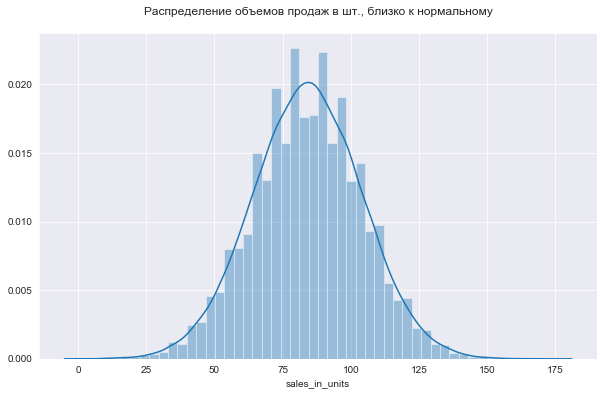

In [37]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.distplot(sales_df.sales_in_units)
plt.title('Распределение объемов продаж в шт., близко к нормальному\n');

**Вычислить квадратное отклонение выборки**  

In [38]:
sales_df.describe()

,month,sales_in_units,stock_balance_in_units,cost_price_rub,price_rub,total_revenue,profit
count,"60,074.00","60,074.00","56,525.00","56,525.00","56,525.00","56,525.00","56,525.00"
mean,9.00,84.10,482.57,906.80,"2,268.84","190,842.49","114,566.00"
std,2.00,19.94,586.74,345.81,910.43,"90,882.62","57,955.52"
min,6.00,2.00,1.00,300.00,602.00,"3,226.00","1,652.00"
25%,7.00,71.00,122.00,609.00,"1,493.00","118,160.00","69,139.00"
50%,9.00,84.00,292.00,913.00,"2,252.00","179,498.00","105,450.00"
75%,11.00,98.00,621.00,"1,205.00","2,963.00","250,800.00","149,940.00"
max,12.00,174.00,"6,832.00","1,500.00","4,476.00","674,001.00","446,301.00"


In [39]:
'Среднеквадратичное отклонение (стандарное отклонение) {:.2f}'.format(sales_df.sales_in_units.std(ddof=1))

'Среднеквадратичное отклонение (стандарное отклонение) 19.94'

**Диапазон 95% значений.**

Расчитаем 95% диапазон значений через персентили, слева 2,5%, справа 97,5 

In [40]:
'Левый граница {:.2f}'.format(np.percentile(sales_df.sales_in_units, 2.5))

'Левый граница 45.00'

In [41]:
'Правый граница {:.2f}'.format(np.percentile(sales_df.sales_in_units, 97.5))

'Правый граница 123.00'

**Построить график распределения количества буквенных размеров ('M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS') в выборке**

In [42]:
sales_df.head()

,article_old,size,month,sales_in_units,article_new,stock_balance_in_units,cost_price_rub,price_rub,total_revenue,profit
0,02025727Y052D0/55,XS,9,88,02025727Y05255D0,945.00,564.00,"1,258.00","110,704.00","61,072.00"
1,02025727Y052D0/55,S,6,128,02025727Y05255D0,861.00,539.00,"1,471.00","188,288.00","119,296.00"
2,020245D5Z022/55D0,M,7,83,020245D5Z02255D0,"1,001.00","1,057.00","2,526.00","209,658.00","121,927.00"
3,020245D5Z022/55D0,M,9,68,020245D5Z02255D0,"1,001.00","1,057.00","2,526.00","171,768.00","99,892.00"
4,020245D5Z022/55D0,L,6,74,020245D5Z02255D0,623.00,"1,330.00","3,844.00","284,456.00","186,036.00"


In [43]:
size_filter = ['M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS']

In [44]:
size_TOP_sales = sales_df.query('size == @size_filter & 45 <= sales_in_units <= 123')
size_TOP_sales.head()

,article_old,size,month,sales_in_units,article_new,stock_balance_in_units,cost_price_rub,price_rub,total_revenue,profit
0,02025727Y052D0/55,XS,9,88,02025727Y05255D0,945.00,564.00,"1,258.00","110,704.00","61,072.00"
2,020245D5Z022/55D0,M,7,83,020245D5Z02255D0,"1,001.00","1,057.00","2,526.00","209,658.00","121,927.00"
3,020245D5Z022/55D0,M,9,68,020245D5Z02255D0,"1,001.00","1,057.00","2,526.00","171,768.00","99,892.00"
4,020245D5Z022/55D0,L,6,74,020245D5Z02255D0,623.00,"1,330.00","3,844.00","284,456.00","186,036.00"
5,020245D5Z022/55D0,L,7,104,020245D5Z02255D0,623.00,"1,330.00","3,844.00","399,776.00","261,456.00"


In [45]:
size_m = ['M']
size_l = ['L']
size_s = ['S']
size_xl = ['XL']
size_xs = ['XS']
size_xxl = ['XXL']
size_xxxl = ['XXXL']
size_xxs = ['XXS']

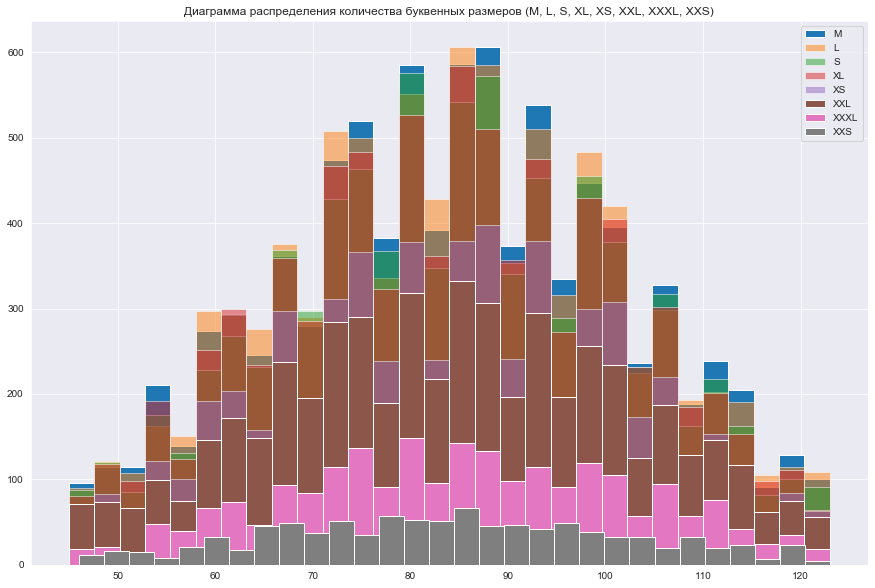

In [46]:
plt.figure(figsize=(15, 10))

plt.hist(size_TOP_sales.query('size == @size_m').sales_in_units, bins=30, alpha=1, label='M')
plt.hist(size_TOP_sales.query('size == @size_l').sales_in_units, bins=30, alpha=0.5, label='L')
plt.hist(size_TOP_sales.query('size == @size_s').sales_in_units, bins=30, alpha=0.5, label='S')
plt.hist(size_TOP_sales.query('size == @size_xl').sales_in_units, bins=30, alpha=0.5, label='XL')
plt.hist(size_TOP_sales.query('size == @size_xs').sales_in_units, bins=30, alpha=0.5, label='XS')
plt.hist(size_TOP_sales.query('size == @size_xxl').sales_in_units, bins=30, alpha=1, label='XXL')
plt.hist(size_TOP_sales.query('size == @size_xxxl').sales_in_units, bins=30, alpha=1, label='XXXL')
plt.hist(size_TOP_sales.query('size == @size_xxs').sales_in_units, bins=30, alpha=1, label='XXS')

plt.legend(loc='upper right')
plt.title('Диаграмма распределения количества буквенных размеров (М, L, S, XL, XS, XXL, XXXL, XXS)')
plt.show();

> мало интформатинвно конечно

**График количества артикулов буквенных размеров ('M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS') в 95% выборке**

In [47]:
size_TOP_sales.groupby('size').agg({'sales_in_units': 'sum'}).reset_index()

,size,sales_in_units
0,L,772612
1,M,780953
2,S,720264
3,XL,719115
4,XS,515612
5,XXL,445270
6,XXS,82663
7,XXXL,195092


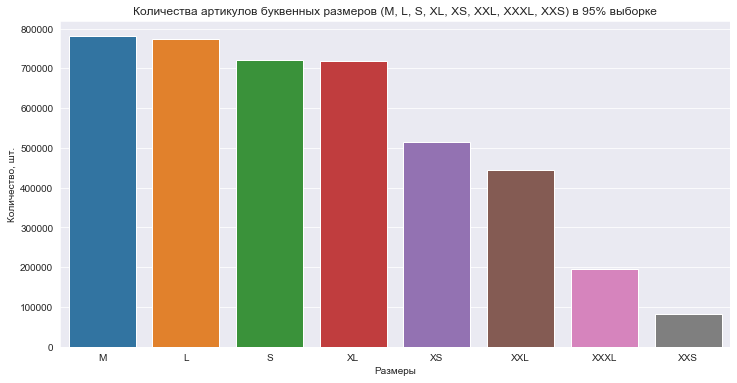

In [48]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='size', y='sales_in_units', 
                 data=size_TOP_sales.groupby('size').agg({'sales_in_units': 'sum'}).reset_index()\
                 .sort_values(by='sales_in_units', ascending=False))

ax.set_title('Количества артикулов буквенных размеров (M, L, S, XL, XS, XXL, XXXL, XXS) в 95% выборке')
ax.set(ylabel='Количество, шт.')
ax.set(xlabel='Размеры');

**Итоги**
- Общая сумма продаж в рублях за июль 1,537,839,897.00 рублей
- Общая сумма прибыли в рублях за октябрь 925,606,635.00 рублей
- Артикул(новый), 5 место по продажам а августе - **42025327F5637500**, сумма продаж = 1,929,854.00 рублей.
- Остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе = 27455
- Распределение объемов продаж близко к нормальному
- Среднеквадратичное отклонение (стандарное отклонение) = 19.94
- 95% диапазон количества проданных изделий по артикулам - от 45 до 123 штук 
- Графики приведены выше